In [1]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import matplotlib as mpl

import os, sys
import pickle as pkl
from scipy import interpolate
import scipy as sp

sys.path.append(r"C:\Users\mikek\OneDrive\Project\DLS\DLS-git")

from DLScommonTools import *
from unpackConfigurationsMK import *

%load_ext autoreload
%autoreload 2

# Read balance file

## Read eqdsk

In [2]:
eqpath = r"C:\Users\mikek\OneDrive\Project\DLS\from_stuart\2024-01-15 - SPR45 correct equilibrium\AH_PI4_P5.geqdsk"
wallpath = r"C:\Users\mikek\OneDrive\Project\DLS\from_stuart\divertor-design\divertor-design\SPR45.txt"
balancepath = r"C:\Users\mikek\OneDrive\Project\DLS\from_stuart\2023-07-11 - SPR45 balance file\balance.nc"

# Final test

In [4]:
eqb = {}

In [5]:
eqb["eqdsk"] = {}

for side in ["iu", "ou"]: # Inner upper, outer upper.
    eqb["eqdsk"][side] = unpackConfigurationMK(
                                        File = eqpath, 
                                        Type = side, 
                                        filetype = "eqdsk",
                                        wallFile = wallpath,
                                        sepadd=1, 
                                        resolution = 200,
                                        diagnostic_plot = True
                                        )

c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\freeqdsk\geqdsk.py:378: UserWarning: The value of 'simagx' should be duplicated. Found values 6.27547229 and 1.509819835
  warnings.warn(
c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\freeqdsk\geqdsk.py:378: UserWarning: The value of 'sibdry' should be duplicated. Found values 1.509819835 and 6.27547229
  warnings.warn(


Fewer than 3 points given for limiter/wall. Ignoring.


ValueError: attempt to get argmax of an empty sequence

In [27]:
eqb["bal"] = {}

for side in ["iu", "ou"]: # Inner upper, outer upper.
    eqb["bal"][side] = unpackConfigurationMK(
                                        File = balancepath, 
                                        Type = side, 
                                        filetype = "balance",
                                        wallFile = False,
                                        sepadd=1, 
                                        resolution = 200
                                        )

In [33]:
%matplotlib inline


In [51]:
from freegs import fieldtracer
fieldtracer?

Type:        module
String form: <module 'freegs.fieldtracer' from 'c:\\Users\\mikek\\OneDrive\\Project\\pyenvs\\fusion-a-310\\lib\\site-packages\\freegs\\fieldtracer.py'>
File:        c:\users\mikek\onedrive\project\pyenvs\fusion-a-310\lib\site-packages\freegs\fieldtracer.py
Docstring:   <no docstring>

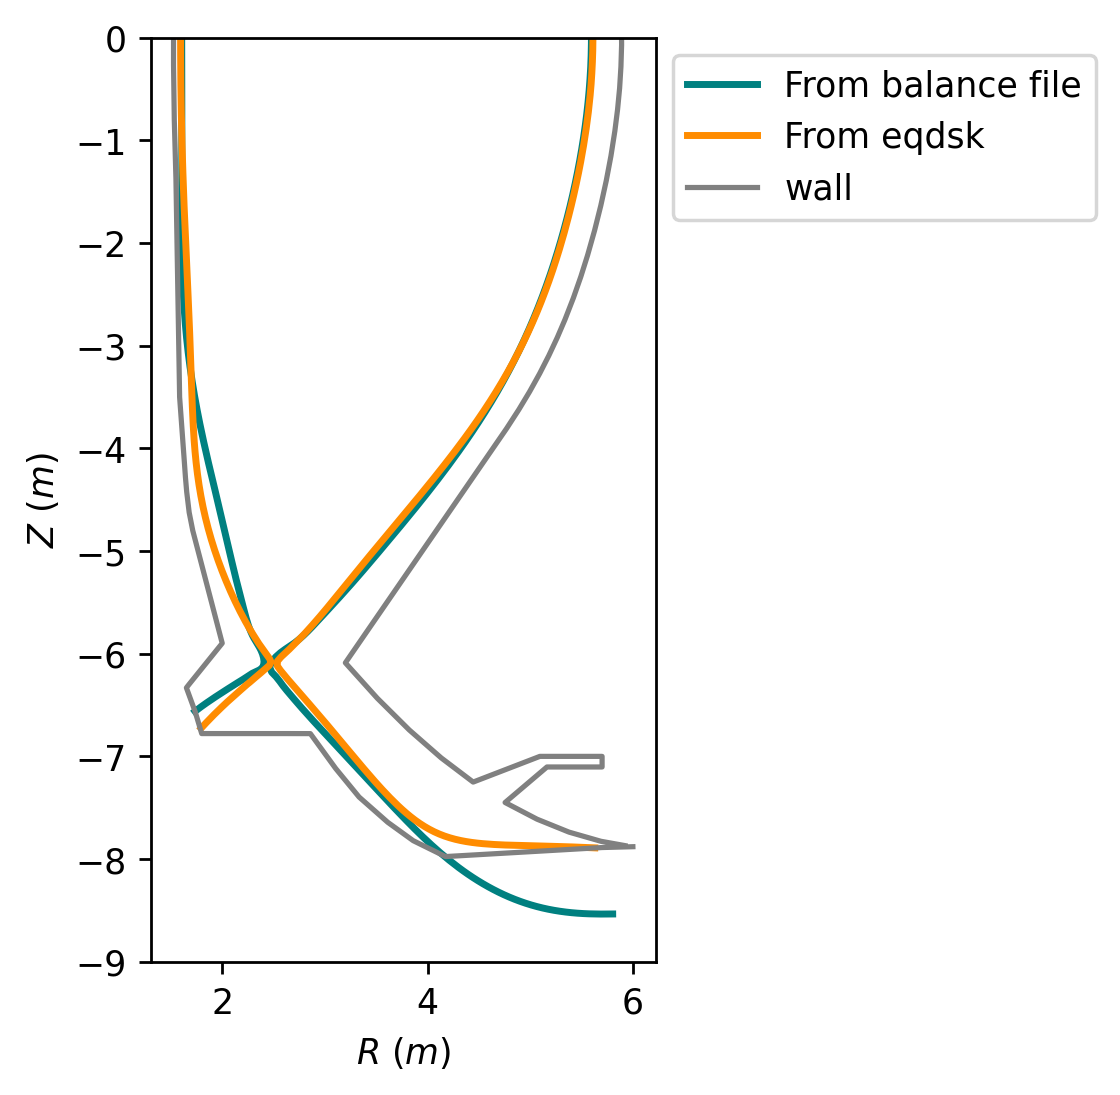

In [50]:
fig, ax = plt.subplots(dpi = 250)

with open (wallpath) as f:
    lines = np.array([line.strip().split() for line in f])
    wall = pd.DataFrame(lines.astype(float), columns = ["R", "Z"])

for src in ["bal", "eqdsk"]:

    d = eqb[src][side]
    d_inner = eqb[src]["iu"]
    d_outer = eqb[src]["ou"]
    
    label = {"bal":"From balance file", "eqdsk":"From eqdsk"}[src]
    color = {"bal": "teal", "eqdsk":"darkorange"}[src]

    ax.plot(d_inner["R"], d_inner["Z"]*-1, linewidth = 2, marker = "o", markersize = 0, alpha = 1, color = color)
    ax.plot(d_outer["R"], d_outer["Z"]*-1, linewidth = 2, marker = "o", markersize = 0, alpha = 1, color = color, label = label)
    
ax.plot(wall["R"], wall["Z"], label = "wall", c = "grey")
ax.set_xlabel("$R\ (m)$")
ax.set_ylabel("$Z\ (m)$")
ax.set_ylim(-9, 0)
ax.legend(loc = "upper left", bbox_to_anchor = (1,1))
ax.set_aspect("equal")

In [4]:


Rkeep, Zkeep, Btotkeep, Bpolkeep = returnSOLring(
    eqname = eqpath,
    wallname = wallpath,
    SOlmultiplier = 0.00001
)

c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\freeqdsk\geqdsk.py:378: UserWarning: The value of 'simagx' should be duplicated. Found values 6.43475177 and 1.576248984
  warnings.warn(
c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\freeqdsk\geqdsk.py:378: UserWarning: The value of 'sibdry' should be duplicated. Found values 1.576248984 and 6.43475177
  warnings.warn(


Fewer than 3 points given for limiter/wall. Ignoring.


In [46]:
from freegs.machine import Machine

with open(eqname) as f:

    tokamak = machine.EmptyTokamak()

    R,Z,Router,Zouter,btot,br,bz = readSeparatrix(f,
                                                tokamak = tokamak,
                                                wall = wallname,
                                                SOlmultiplier = 0.00001)

c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\freeqdsk\geqdsk.py:378: UserWarning: The value of 'simagx' should be duplicated. Found values 6.43475177 and 1.576248984
  warnings.warn(
c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\freeqdsk\geqdsk.py:378: UserWarning: The value of 'sibdry' should be duplicated. Found values 1.576248984 and 6.43475177
  warnings.warn(


Fewer than 3 points given for limiter/wall. Ignoring.


In [55]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    squeeze: 'bool | None' = None,
    prefix: 'str | lib.NoDefault' = <no_default>,
    mangle_dupe_cols: 'bool' = True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates=None,
    infer

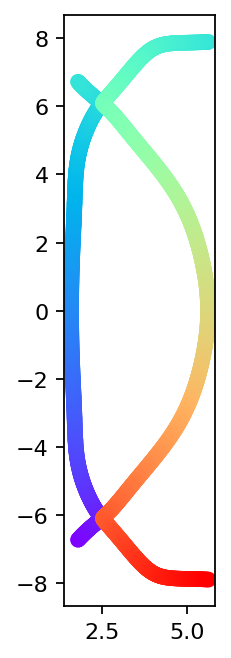

In [109]:
fig, ax = plt.subplots(dpi = 160)
ax.set_aspect("equal")

cmap = plt.get_cmap("rainbow", len(Rkeep))
colors = [cmap(i) for i in range(len(Rkeep))]

# ax.plot(Router, Zouter)
ax.scatter(Rkeep, Zkeep, color = colors)

# ax.plot(wallRZ.R, wallRZ.Z)

# Reconstruct

## Balance

In [136]:
sepadd = 0
polModulator = 1,
File = r"C:\Users\mikek\OneDrive\Project\DLS\from_stuart\2023-07-11 - SPR45 balance file\balance.nc"
full = {}

rootgrp = Dataset(File, "r", format="NETCDF4")
sep = rootgrp['jsep'][0] # separatrix cell ring
sep = sep + sepadd # select cell ring to work on
bb = rootgrp["bb"] # B vector array

full["Bpol"] = bb[0][sep]*polModulator

# bb[A] returns B components x, y, z and B magnitude for 
# A = 0, 1, 2 and 3 respectively for each cell centre in 2D grid
full["Btot"] = bb[3][sep] # Mistake in Cyd's version. [3] is the total field

# unpack dimensions of super-x
# both r and z have the same shape as bb
r = rootgrp['crx'] # corner radial coordinate (m)
z = rootgrp['cry'] # corner vertical coordinate (m)

# ring cell centres
full["R"] = np.mean([r[0][sep], r[1][sep], r[2][sep], r[3][sep]], axis = 0)
full["Z"] = np.mean([z[0][sep], z[1][sep], z[2][sep], z[3][sep]], axis = 0)

# Entire grid cell centres
Zs = np.mean([z[0], z[1], z[2], z[3]], axis = 0)
Rs = np.mean([r[0], r[1], r[2], r[3]], axis = 0)

## eqdsk

In [8]:
full = {}
full["R"],full["Z"],full["Btot"],full["Bpol"] = returnSOLring(eqpath,wallpath)
Zs = full["Z"]
Rs = full["R"]


c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\freeqdsk\geqdsk.py:378: UserWarning: The value of 'simagx' should be duplicated. Found values 6.43475177 and 1.576248984
  warnings.warn(
c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\freeqdsk\geqdsk.py:378: UserWarning: The value of 'sibdry' should be duplicated. Found values 1.576248984 and 6.43475177
  warnings.warn(


Fewer than 3 points given for limiter/wall. Ignoring.


In [20]:
"""------XPOINT, EDGE, MIDPLANE LOCATIONS"""
# Find the X-points, edges and midpoints
# SOLPS draws grid clockwise from inner lower target
# Points of gradient flipping represent features of interest

gradR = np.gradient(full["R"])

reversals = []
for i in range(1, len(gradR)):
    if np.sign(gradR[i-1]) != np.sign(gradR[i]):
        reversals.append(i)
        
# Sometimes there are points of zero R gradient which result in duplicate reversals
toremove = []
for i in reversals:
    if gradR[i] == 0:
        toremove.append(i+1)
for i in toremove:
    reversals.remove(i)

omp = reversals[-2] # outer midplane
imp = reversals[1] # inner midplane
xpoint = dict()
target = dict()
sol = defaultdict(dict)

xpoint["il"] = reversals[0] # inner lower xpoint
xpoint["iu"] = reversals[2] # outer upper xpoint
xpoint["ol"] = reversals[-1]-1 # outer lower xpoint
xpoint["ou"] = reversals[-3] # outer upper xpoint

target["il"] = 0
target["iu"] = reversals[3]+1
target["ou"] = reversals[4]-1
target["ol"] = len(gradR)

# Define start and end for each segment, going clockwise from bottom left.
start = dict(); end = dict()
start["il"] = target["il"]
start["iu"] = imp-1
start["ou"] = target["ou"]
start["ol"] = omp-1

end["il"] = imp+1
end["iu"] = target["iu"]
end["ou"] = omp+1
end["ol"] = target["ol"]

# Extract the four SOLs using their starts and ends.
    
sol = defaultdict(dict) # Dict of parameters in each SOL side. sol[param][side]

for param in full.keys():
    for side in ["il", "iu", "ou", "ol"]:
        sol[param][side] = full[param][start[side] : end[side]]

# Invert inner lower and outer upper so that all SOLs 
# are consistent and start at midplane (needs to be done under this convention to work)
# This can be later reversed to start at target by input flag "convention=target_to_midplane"
for param in full.keys():
    sol[param]["il"] = sol[param]["il"][::-1]
    sol[param]["ou"] = sol[param]["ou"][::-1]

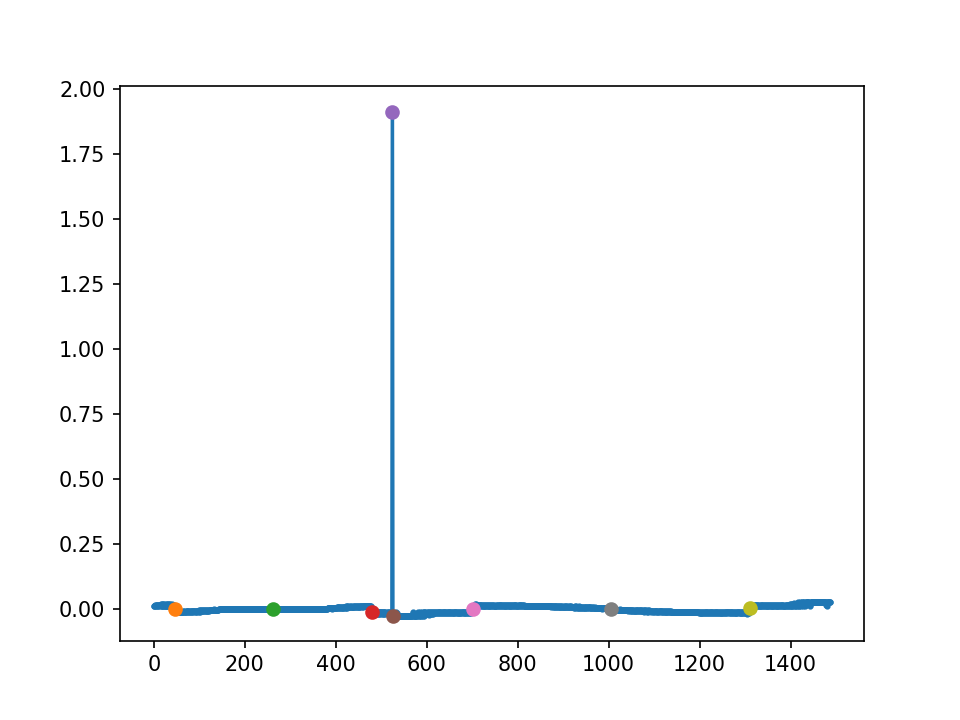

In [21]:
plt.close("all")

fig, ax = plt.subplots(dpi = 150)
ax.plot(gradR, marker = "o", ms = 2)

for i in reversals:
    ax.plot(i, gradR[i], "o")

In [157]:
np.sign(-1)

-1

In [6]:
reversals

NameError: name 'reversals' is not defined

In [14]:
[gradR[x] for x in reversals]

[-0.0008490514914176739,
 0.0,
 -0.01016414133279464,
 1.9117042220572453,
 -0.025390625,
 0.00040860309073731393,
 0.0,
 0.0022730553151990573]

In [17]:
%matplotlib widget

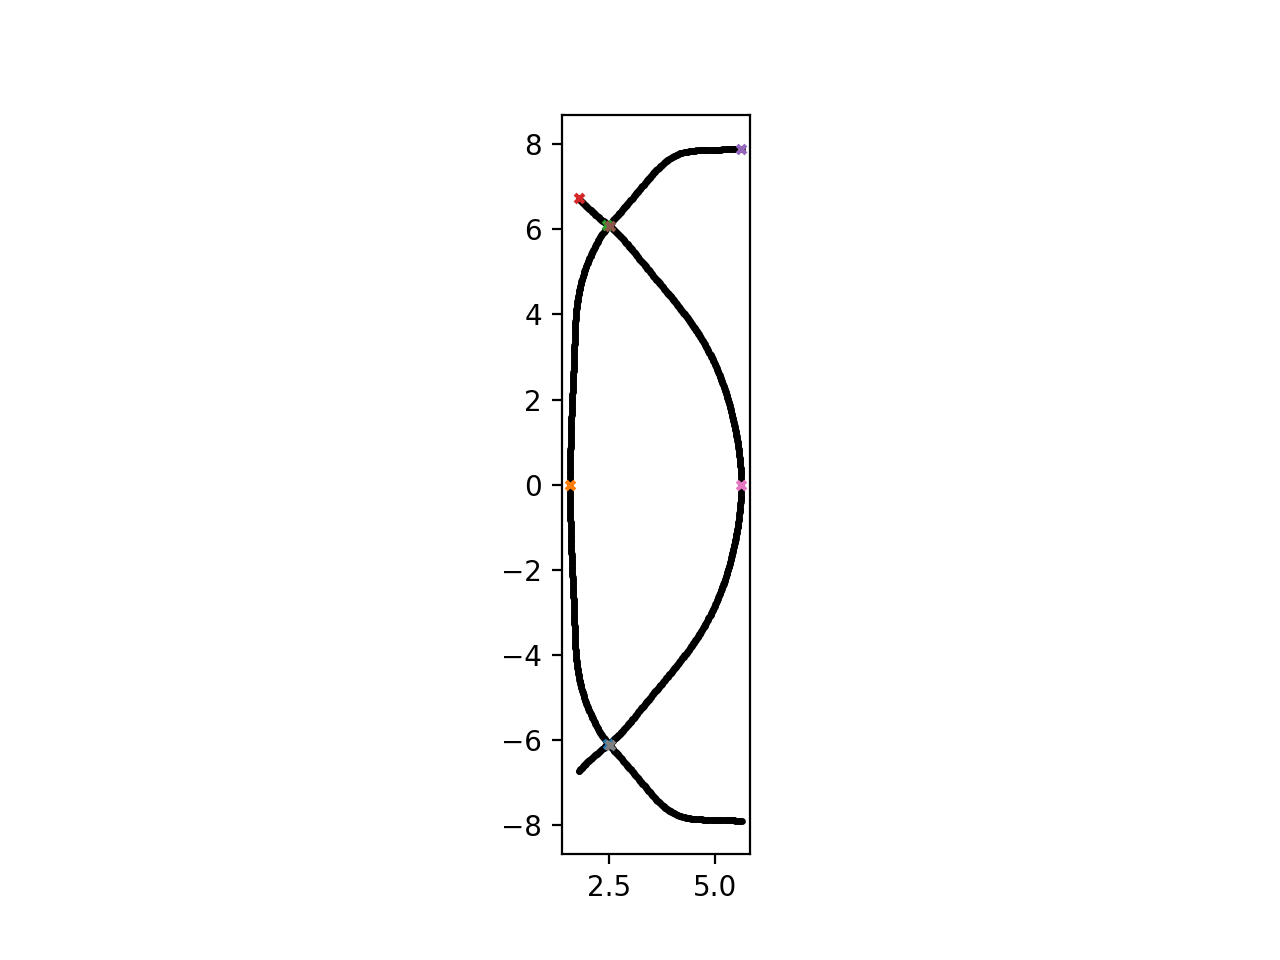

In [18]:
plt.close("all")
fig, ax = plt.subplots(dpi = 200)
ax.set_aspect("equal")

cmap = plt.get_cmap("rainbow", len(full["R"]))
colors = [cmap(i) for i in range(len(full["Z"]))]

# ax.plot(Router, Zouter)
ax.scatter(full["R"], full["Z"], color = "k", s = 2)

# for i in reversals:

i = reversals[1]
for i in reversals:
    ax.scatter(full["R"][i], full["Z"][i], s = 10, marker = "x")

# ax.plot(wallRZ.R, wallRZ.Z)

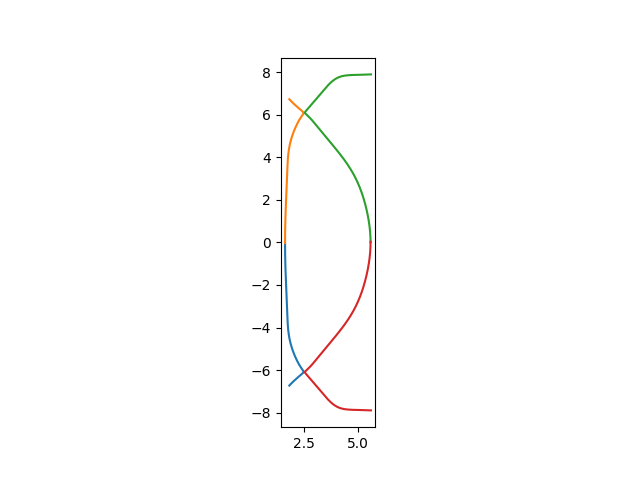

In [22]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
for side in ["il", "iu", "ou", "ol"]:
    ax.plot(sol["R"][side], sol["Z"][side], label = side)

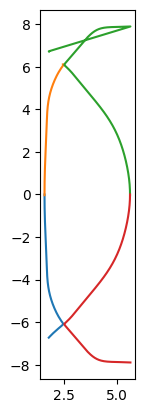

In [ ]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
for side in ["il", "iu", "ou", "ol"]:
    ax.scatter(sol["R"][side], sol["Z"][side], label = side)

NameError: name 'eqb' is not defined

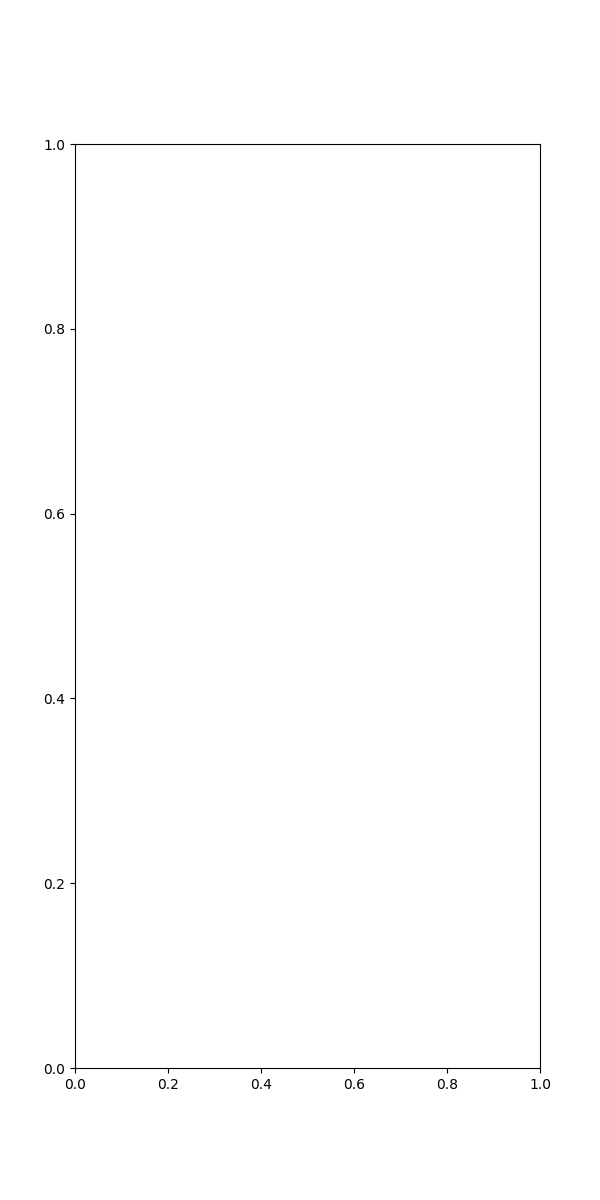

In [23]:
fig, ax = plt.subplots(1, figsize = (6,12))
k = 6
side = "iu"
cvar = "power"

for src in ["bal", "eqdsk"]:

    d = eqb[src][side]
    d_inner = eqb[src]["iu"]
    d_outer = eqb[src]["ou"]

    ax.plot(d_inner["R"], d_inner["Z"]*-1, linewidth = 3, marker = "o", markersize = 0, color = "black", alpha = 1)
    ax.plot(d_outer["R"], d_outer["Z"]*-1, linewidth = 3, marker = "o", markersize = 0, color = "black", alpha = 1)
ax.set_xlabel("$R\ (m)$", fontsize = 15)
ax.set_ylabel("$Z\ (m)$")
ax.set_ylim(-9, -5)
ax.set_xlim(1.5,6)

